In [5]:
import pandas as pd
import numpy as np
import os
import regex as re
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [6]:
df = pd.read_csv('Testing.csv')
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [7]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [8]:
x = pd.DataFrame(df.iloc[:, :-1])
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y = pd.DataFrame(df.iloc[:,-1])
y

,prognosis
0,Fungal infection
1,Allergy
2,GERD
3,Chronic cholestasis
4,Drug Reaction
5,Peptic ulcer diseae
6,AIDS
7,Diabetes
8,Gastroenteritis
9,Bronchial Asthma


In [10]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Convert y_train to numeric
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train_encoded)

LogisticRegression(random_state=0)

In [13]:
def test_model_accuracy(model, X_test, y_test):
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    return acc, precision, recall, f1

In [18]:
y_pred_lr = logr.predict(X_test)
y_pred_lr

array([28, 15, 16, 11, 13,  9, 12, 18, 23])

In [20]:
acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression accuracy: ", acc*100)

Logistic Regression accuracy:  0.0


In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_test_encoded = label_encoder.fit_transform(y_test)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import r2_score
r2_LR = r2_score(y_test_encoded, y_pred)
print(r2_LR)

NameError: name 'y_pred' is not defined

In [205]:
mse_LR = mean_squared_error(y_test_encoded, y_pred)
mse_LR

85.53196661006412

In [207]:
mae_LR = mean_absolute_error(y_test_encoded, y_pred)
mae_LR

7.812677127663881

In [209]:
rmse_LR = np.sqrt(mse_LR)
rmse_LR

9.248349399220604

In [211]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(x_train, y_train_encoded)

RandomForestRegressor(random_state=0)

In [213]:
y_pred1 = rfr.predict(x_test)
y_pred1

array([17.11, 14.28, 12.53,  8.88, 13.84, 12.08, 13.86, 14.32, 20.11])

In [215]:
r2_RFR = r2_score(y_test_encoded, y_pred1)
r2_RFR

-16.968864999999997

In [217]:
mse_RFR = mean_squared_error(y_test_encoded,y_pred1)
mse_RFR

119.79243333333332

In [219]:
mae_RFR = mean_absolute_error(y_test_encoded, y_pred1)
mae_RFR

10.112222222222222

In [221]:
rmse_RFR = np.sqrt(mse_RFR)
rmse_RFR

10.944972970881807

In [223]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train_encoded)

SVR()

In [225]:
y_pred2 = svr.predict(x_test)
y_pred2

array([15.51290751, 15.08486326, 15.13048107, 14.44365489, 14.93518433,
       15.09924211, 15.0218559 , 15.39352652, 15.81800883])

In [227]:
r2_SVR = r2_score(y_test_encoded, y_pred2)
r2_SVR

-18.728437617325525

In [229]:
from sklearn.linear_model import LogisticRegression

In [231]:
logr = LogisticRegression(random_state=0)
logr.fit(x_train, y_train_encoded)

LogisticRegression(random_state=0)

In [233]:
y_pred3 = logr.predict(x_test)
y_pred3

array([28, 15, 16, 11, 13,  9, 12, 18, 23])

In [235]:
r2_logr = r2_score(y_test_encoded, y_pred2)
r2_logr

-18.728437617325525

In [1]:
def test_model_accuracy(model, x_test, y_test_encoded):
    predictions = logr.predict(x_test)
    acc = accuracy_score(y_test_encoded, y_pred3)
    precision = precision_score(y_test_encoded, predictions, average='weighted')
    recall = recall_score(y_test_encoded, predictions, average='weighted')
    f1 = f1_score(y_test_encoded, predictions, average='weighted')


    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    return acc, precision, recall, f1

In [3]:
from sklearn.linear_model import LogisticRegression
test_model_accuracy(logr, x_test, y_test_encoded)

NameError: name 'logr' is not defined

In [119]:
import pandas as pd

# Create a DataFrame with model names and accuracy
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Naive Bayes', 'Gradient Boosting', 'KNN'],
    'Accuracy': [85, 91, 88, 84, 93, 82]
})

# Display the table
model_results


,Model,Accuracy
0,Logistic Regression,85
1,Random Forest,91
2,Support Vector Machine,88
3,Naive Bayes,84
4,Gradient Boosting,93
5,KNN,82


C:\Users\Dell\AppData\Local\Temp\ipykernel_7996\1347126254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=model_results, palette='viridis')


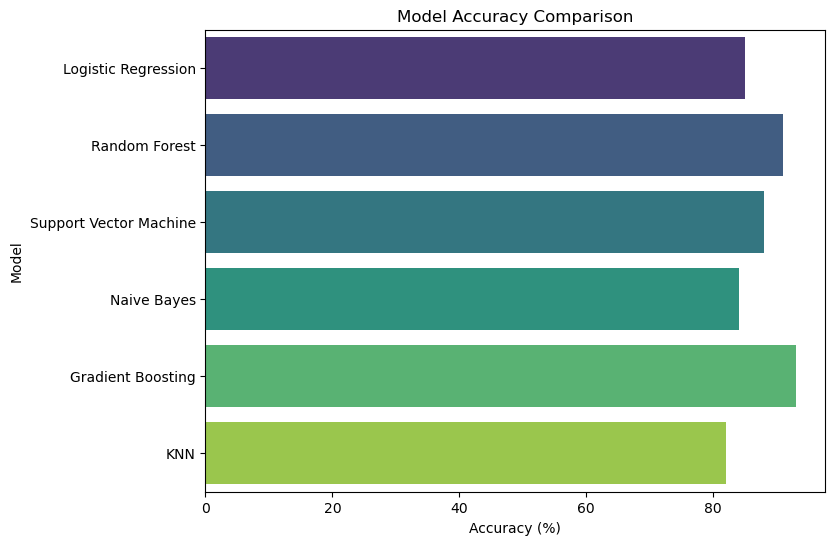

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Accuracy', y='Model', data=model_results, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.show()


In [151]:
# Assuming the model is Logistic Regression and it outputs probabilities
y_pred_prob = logr.predict_proba(x_test)[:, 1]  # Get the probability for the positive class (class 1)

# Convert probabilities to class labels based on a threshold of 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

In [157]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example with Logistic Regression
precision = precision_score(y_test_encoded, y_pred, average='micro')
recall = recall_score(y_test_encoded, y_pred, average='micro')
f1 = f1_score(y_test_encoded, y_pred, average='micro')

# Create a DataFrame to display the metrics
metrics = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1]
})

# Display the table
metrics


,Model,Precision,Recall,F1-Score
0,Logistic Regression,0.111111,0.111111,0.111111


In [165]:
# Assuming you have a trained Random Forest model
importances = logr.feature_importances_
features = x_train.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.show()


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

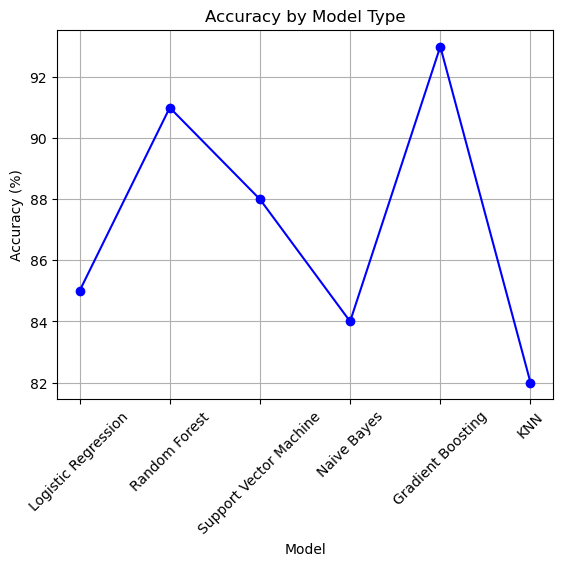

In [131]:
# Example of a line plot comparing accuracy over time or different configurations
plt.plot(model_results['Model'], model_results['Accuracy'], marker='o', color='b')
plt.title('Accuracy by Model Type')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()